# Load DataSet

In [68]:
import numpy as np

!wget -O Data.npz https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
data = np.load('Data.npz')
print(data.files)

--2022-01-12 15:25:30--  https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19725078 (19M) [application/octet-stream]
Saving to: ‘Data.npz’

Data.npz            100%[===================>]  18.81M  5.43MB/s    in 3.5s    

2022-01-12 15:25:35 (5.43 MB/s) - ‘Data.npz’ saved [19725078/19725078]

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


# Visualization

In [69]:
import numpy as np

x_train = data['train_images']
y_train = data['train_labels']

x_val = data['val_images']
y_val = data['val_labels']

x_test = data['test_images']
y_test = data['test_labels']

print('Labels: ', np.unique(y_train))
labels_number = len(np.unique(y_train))

print('train_images shape: ', data['train_images'].shape)
print('train_labels shape: ', data['train_labels'].shape)

print('val_images shape: ', data['val_images'].shape)
print('val_labels shape: ', data['val_labels'].shape)

print('test_images shape: ', data['test_images'].shape)
print('test_labels shape: ', data['test_labels'].shape)

Labels:  [0 1 2 3 4 5 6]
train_images shape:  (7007, 28, 28, 3)
train_labels shape:  (7007, 1)
val_images shape:  (1003, 28, 28, 3)
val_labels shape:  (1003, 1)
test_images shape:  (2005, 28, 28, 3)
test_labels shape:  (2005, 1)


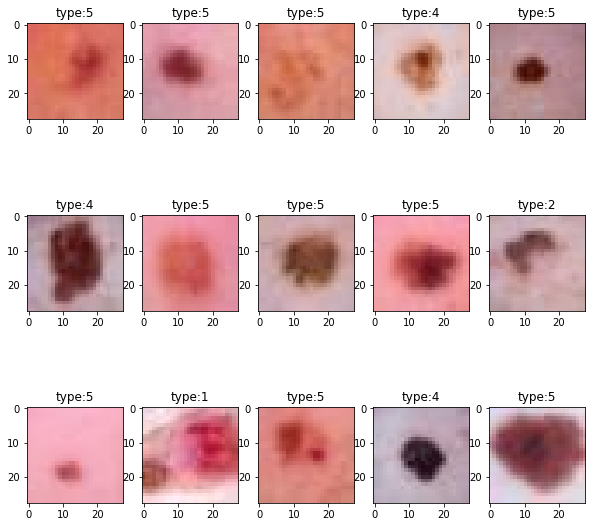

In [70]:
def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(10, 10))
    columns = 5
    rows = 3
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i]
        plt.imshow(img)
        plt.title('type:'+str(y_train[i][0]))
    plt.show()
plot_img(x_train, y_train)

# Unbalancment of data 

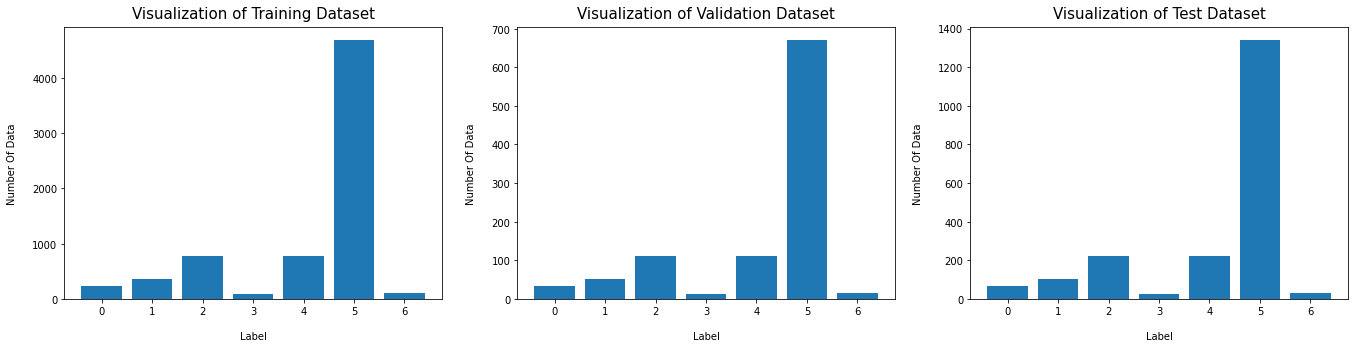

In [71]:
from matplotlib import pyplot as plt

def data_summary(y):
    data = dict()
    for i in range(labels_number):
        data[str(i)] = (int)(np.sum(y==i))
    group_data = list(data.values())
    group_names = list(data.keys())
    return group_data, group_names

def draw_ax(i, group_data, group_names, title):
    ax[i].bar(group_names, group_data)
    ax[i].set_title("Visualization of "+ title , y=1.01, fontsize=15)
    ax[i].set_ylabel("Number Of Data", labelpad=15)
    ax[i].set_xlabel("Label", labelpad=15)

fig, ax = plt.subplots(1, 3, figsize=(23, 5))

group_data, group_names = data_summary(y_train)
draw_ax(0, group_data, group_names, "Training Dataset")

group_data, group_names = data_summary(y_val)
draw_ax(1, group_data, group_names, "Validation Dataset")

group_data, group_names = data_summary(y_test)
draw_ax(2, group_data, group_names, "Test Dataset")

# Preprocess

In [73]:
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix,\
 PrecisionRecallDisplay, precision_recall_curve, average_precision_score
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout,\
 Flatten, Dense

In [74]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, labels_number)
y_val = tf.keras.utils.to_categorical(y_val, labels_number)
y_test = tf.keras.utils.to_categorical(y_test, labels_number)
print(y_train.shape)
print(x_train.shape)

(7007, 7)
(7007, 28, 28, 3)


# Model && Training

In [75]:
def model():
  model = tf.keras.models.Sequential(
    [
     Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 3)),
     BatchNormalization(),
     Conv2D(64, kernel_size=(3, 3), activation='relu'),
     BatchNormalization(),
     Conv2D(128, kernel_size=(3, 3), activation='relu'),
     BatchNormalization(),
     MaxPooling2D(pool_size=(2, 2)),
     Conv2D(128, kernel_size=(3, 3), activation='relu'),
     BatchNormalization(),
     MaxPooling2D(pool_size=(2, 2)),
     Dropout(0.3),
     Flatten(),
     Dense(64, activation="relu"),
     BatchNormalization(),
     Dense(7, activation="softmax")
    ])
  return model

In [76]:
model = model()

model.compile(
    optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, name='Adam'),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

history = model.fit(x_train, y_train, epochs=20, batch_size=128,
                     validation_data=(x_val, y_val))

Epoch 1/20
55/55 [==============================] - 4s 54ms/step - loss: 1.4157 - accuracy: 0.6035 - val_loss: 2.8240 - val_accuracy: 0.1097
Epoch 2/20
55/55 [==============================] - 2s 39ms/step - loss: 1.0156 - accuracy: 0.7069 - val_loss: 3.3784 - val_accuracy: 0.1097
Epoch 3/20
55/55 [==============================] - 2s 39ms/step - loss: 0.8677 - accuracy: 0.7301 - val_loss: 2.0848 - val_accuracy: 0.2034
Epoch 4/20
55/55 [==============================] - 2s 39ms/step - loss: 0.7634 - accuracy: 0.7457 - val_loss: 1.6612 - val_accuracy: 0.3180
Epoch 5/20
55/55 [==============================] - 2s 40ms/step - loss: 0.7005 - accuracy: 0.7558 - val_loss: 3.0262 - val_accuracy: 0.1137
Epoch 6/20
55/55 [==============================] - 2s 41ms/step - loss: 0.6666 - accuracy: 0.7685 - val_loss: 1.6282 - val_accuracy: 0.3440
Epoch 7/20
55/55 [==============================] - 2s 40ms/step - loss: 0.5998 - accuracy: 0.7845 - val_loss: 1.7549 - val_accuracy: 0.2632
Epoch 8/20
55

In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 batch_normalization_40 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_41 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_44 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 batch_normalization_42 (Bat  (None, 22, 22, 128)     

In [78]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("loss:", test_loss, "accuracy:", test_accuracy)

63/63 [==============================] - 1s 8ms/step - loss: 0.9054 - accuracy: 0.7367
loss: 0.9054387807846069 accuracy: 0.7366583347320557


In [79]:
def plot_loss(history, title):
  trianing_loss = history.history['loss']
  validation_loss = history.history['val_loss']
  plt.plot(trianing_loss, label='Training loss')
  plt.plot(validation_loss, label='Validation loss')
  plt.title(title)
  plt.legend(['train', 'validation'])
  plt.figure()
  plt.show()

def plot_acc(history, title):
  trian_acc = history.history['accuracy']
  validation_acc = history.history['val_accuracy']
  plt.plot(trian_acc, label='Training acc')
  plt.plot(validation_acc, label='Validation acc')
  plt.title(title)
  plt.legend(['train', 'validation'])
  plt.figure()
  plt.show()

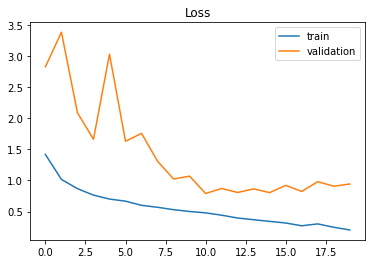

<Figure size 432x288 with 0 Axes>

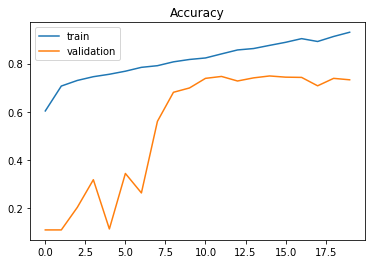

<Figure size 432x288 with 0 Axes>

In [80]:
plot_loss(history,"Loss")
plot_acc(history,"Accuracy")

In [90]:
def calculate_variables(data, model, mode):
    x = data[0] / 255.0
    y = data[1]
    target_names = ['class 0',
                    'class 1',
                    'class 2',
                    'class 3',
                    'class 4',
                    'class 5',
                    'class 6']
    y_pred = model.predict(x)
    y = np.argmax(y, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    cr = classification_report(y, y_pred, target_names=target_names)
    cm = confusion_matrix(y, y_pred)
    print(cr)
    print(cm)
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest')
    plt.colorbar()
    tick_mark = np.arange(len(target_names))
    _ = plt.xticks(tick_mark, target_names, rotation=90)
    _ = plt.yticks(tick_mark, target_names)

def plot_auc(data, model, mode):
    x = data[0] / 255.0
    target_names = ['class 0',
                    'class 1',
                    'class 2',
                    'class 3',
                    'class 4',
                    'class 5',
                    'class 6']
    n_classes = len(target_names)
    y_pred = model.predict(x)
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(data[1][:, i], y_pred[:, i])
    precision["micro"], recall["micro"], _ = precision_recall_curve(
        data[1].ravel(), y_pred.ravel()
    )

    colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "red", "blue"])
    _, ax = plt.subplots(figsize=(10, 8))

    for i, color in zip(range(n_classes), colors):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i])
        display.plot(ax=ax, name=f'AUC for class {i}', color=color)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       228
     class 1       0.00      0.00      0.00       359
     class 2       0.00      0.00      0.00       769
     class 3       0.00      0.00      0.00        80
     class 4       0.00      0.00      0.00       779
     class 5       0.67      1.00      0.80      4693
     class 6       0.00      0.00      0.00        99

    accuracy                           0.67      7007
   macro avg       0.10      0.14      0.11      7007
weighted avg       0.45      0.67      0.54      7007

[[   0    0    0    0    0  228    0]
 [   0    0    0    0    0  359    0]
 [   0    0    0    0    0  769    0]
 [   0    0    0    0    0   80    0]
 [   0    0    0    0    0  779    0]
 [   0    0    0    0    0 4693    0]
 [   0    0    0    0    0   99    0]]


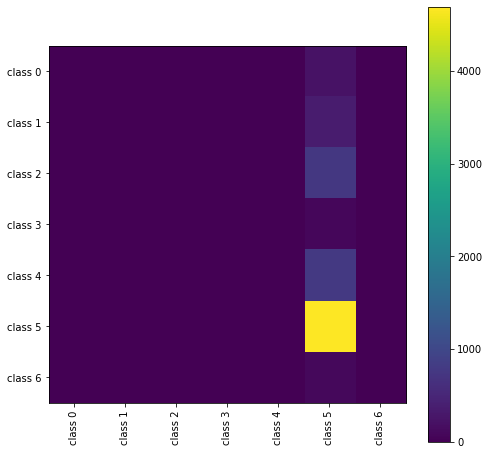

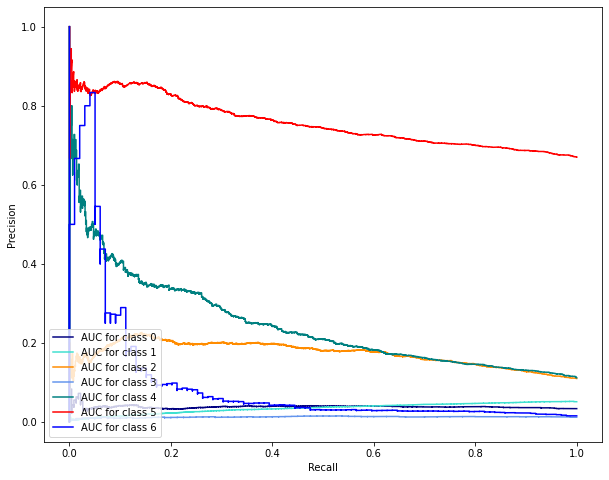

In [91]:
calculate_variables([x_train, y_train], model=model, mode='Train')
plot_auc([x_train, y_train], model=model, mode='Train')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00        33
     class 1       0.00      0.00      0.00        52
     class 2       0.00      0.00      0.00       110
     class 3       0.00      0.00      0.00        12
     class 4       0.00      0.00      0.00       111
     class 5       0.67      1.00      0.80       671
     class 6       0.00      0.00      0.00        14

    accuracy                           0.67      1003
   macro avg       0.10      0.14      0.11      1003
weighted avg       0.45      0.67      0.54      1003

[[  0   0   0   0   0  33   0]
 [  0   0   0   0   0  52   0]
 [  0   0   0   0   0 110   0]
 [  0   0   0   0   0  12   0]
 [  0   0   0   0   0 111   0]
 [  0   0   0   0   0 671   0]
 [  0   0   0   0   0  14   0]]


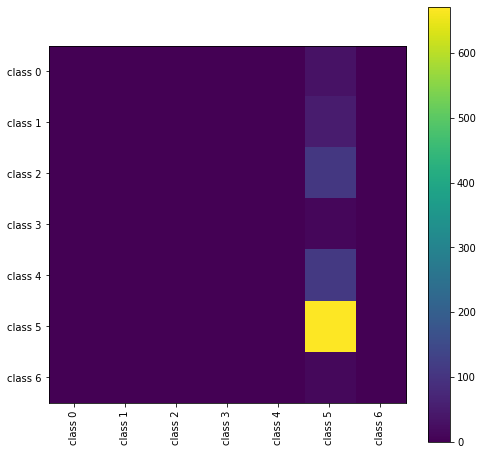

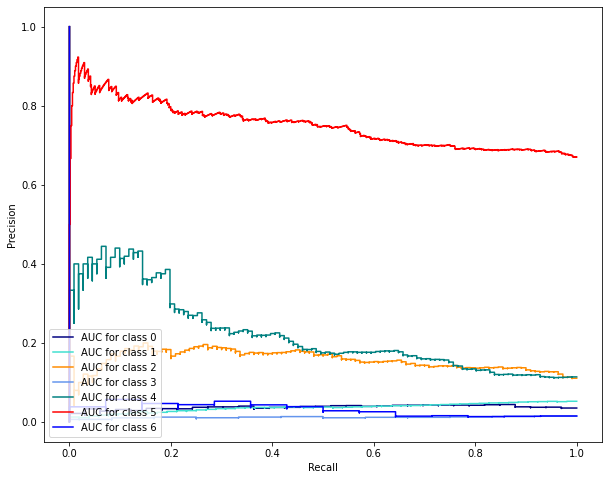

In [92]:
calculate_variables([x_val, y_val], model=model, mode='Validation')
plot_auc([x_val, y_val], model=model, mode='Validation')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00        66
     class 1       0.00      0.00      0.00       103
     class 2       0.00      0.00      0.00       220
     class 3       0.00      0.00      0.00        23
     class 4       0.00      0.00      0.00       223
     class 5       0.67      1.00      0.80      1341
     class 6       0.00      0.00      0.00        29

    accuracy                           0.67      2005
   macro avg       0.10      0.14      0.11      2005
weighted avg       0.45      0.67      0.54      2005

[[   0    0    0    0    0   66    0]
 [   0    0    0    0    0  103    0]
 [   0    0    0    0    0  220    0]
 [   0    0    0    0    0   23    0]
 [   0    0    0    0    0  223    0]
 [   0    0    0    0    0 1341    0]
 [   0    0    0    0    0   29    0]]


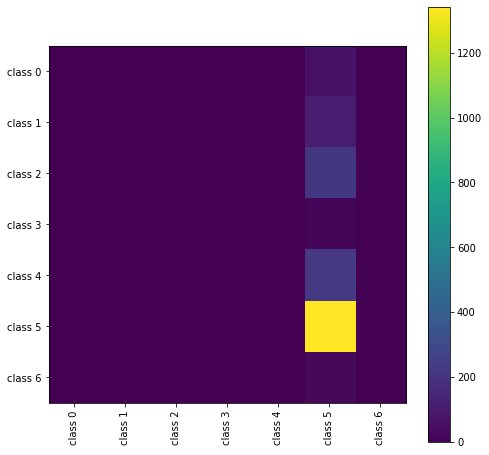

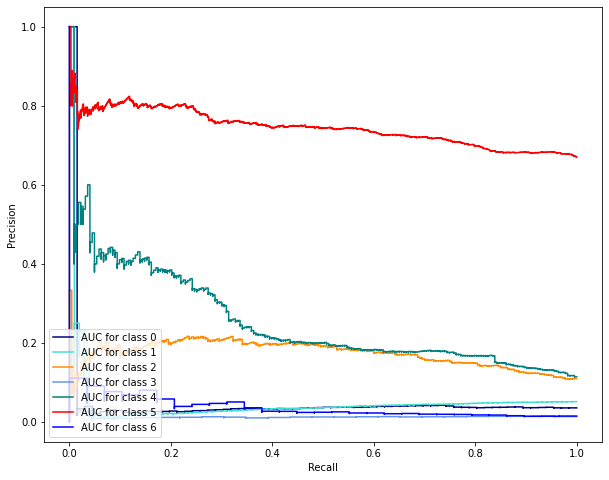

In [101]:
calculate_variables([x_test, y_test], model=model, mode='Test')
plot_auc([x_test, y_test], model=model, mode='Test')